In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Text(0.5, 0, 'Fuel Unit')

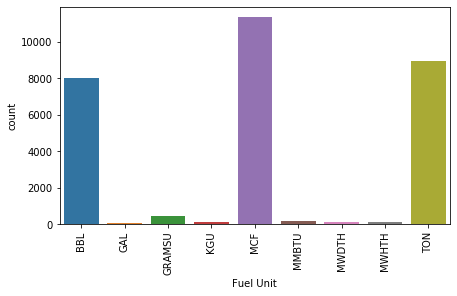

In [2]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
                          'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')

Text(0.5, 0, 'Fuel Unit')

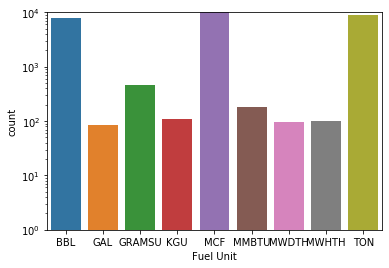

In [3]:
#Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the 
#logarithm of the y-axis as follows:
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 10000)
plt.xlabel('Fuel Unit')

In [4]:
fuel_data = pd.read_csv('C:/Users/Chidinma Kalu/Documents/Datascience Hamoye/stage A/fuel_ferc1.csv', error_bad_lines=False, index_col = 0)

In [5]:
fuel_data.head()

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,
f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
fuel_data.shape

(29523, 10)

In [7]:
fuel_type = pd.DataFrame(fuel_data['fuel_type_code_pudl'].value_counts())

In [8]:
fuel_type.index

Index(['gas', 'coal', 'oil', 'nuclear', 'waste', 'other'], dtype='object')

Text(0, 0.5, 'count')

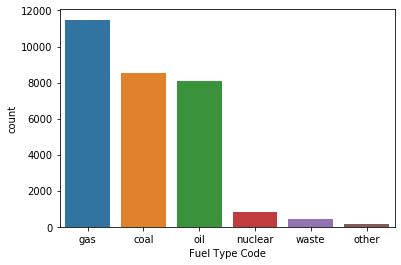

In [9]:
%matplotlib inline
h = sns.barplot(data=fuel_data, x=fuel_type.index, y=fuel_type['fuel_type_code_pudl'])
plt.xlabel('Fuel Type Code')
plt.ylabel('count')

The barchart above shows the order of the popularity of each fuel_type_code. From the bar chart, gas is the most popular fuel_type_code followed by coal and the least from the chart is other fuel_type_code not specified. The same order of popularity of each fuel type is represented below using a Catplot.

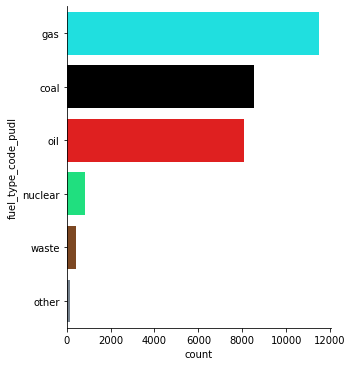

In [10]:
col={"gas":"cyan","coal":"black","oil":"red","nuclear":"springgreen","waste":"saddlebrown","other":'slategray'}
sns.catplot(y='fuel_type_code_pudl', kind="count",data=fuel_data,palette=col,
            order=fuel_data['fuel_type_code_pudl'].value_counts().index)

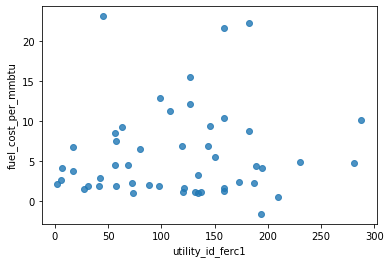

In [11]:
# Select a sample of the dataset
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)

The plot above shows the linear relationship between two columns in the dataset 'utility_id_ferc1' and 'fuel_cost_per_mmbtu'. 

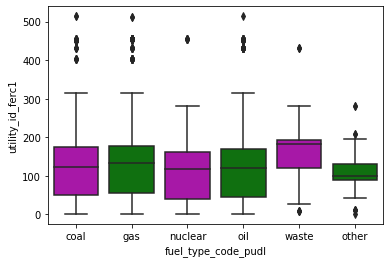

In [12]:
# Box plot
%matplotlib inline
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
            palette=["m", "g"], data=fuel_data)

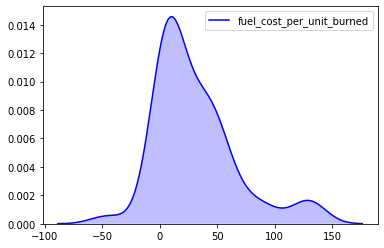

In [13]:
# KDE plot: that shows the probability distribution of observation in a dataset
%matplotlib inline
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")

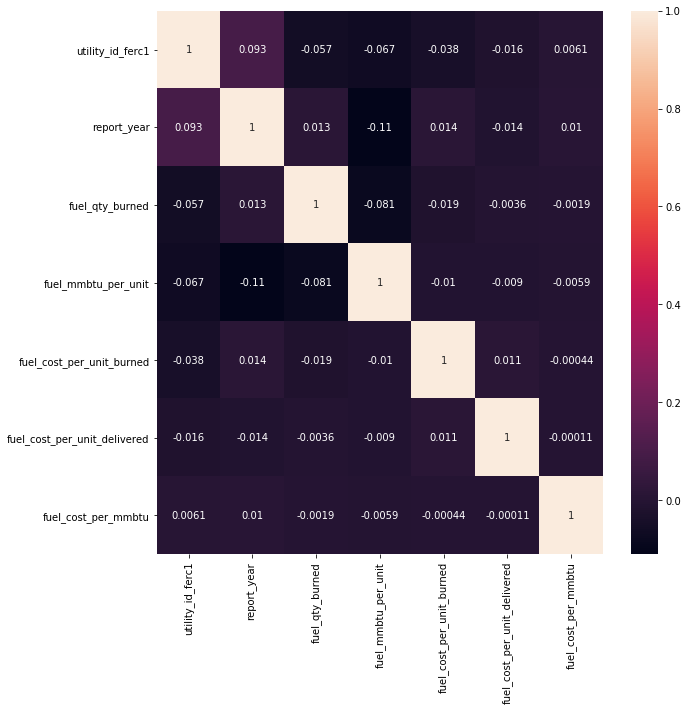

In [14]:
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(fuel_data.corr(), annot=True)

The heatmap above shows the correlation between the features in the dataset. While a sample of the dataset is taken, and the correlation is done and the heatmap is shown below.

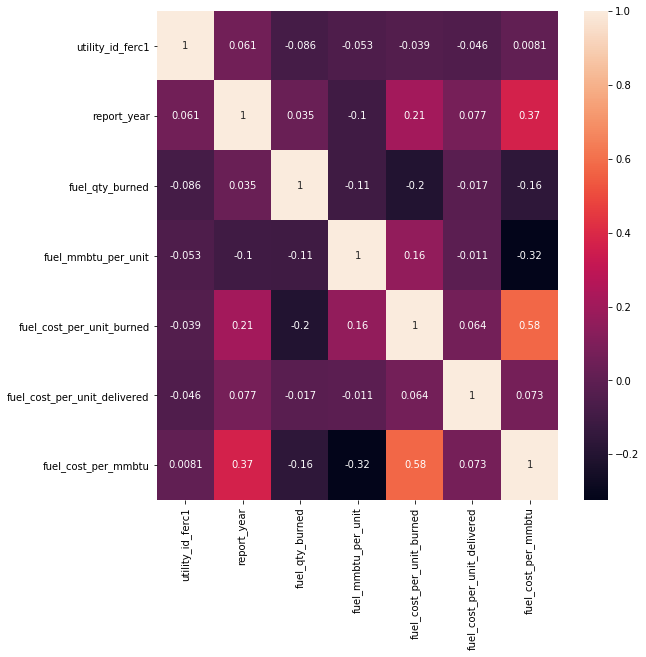

In [15]:
%matplotlib inline
plt.figure(figsize = (9,9))
sample_df = fuel_data.sample(n = 500, random_state = 4)
sns.heatmap(sample_df.corr(), annot = True)

### How popular is a fuel type?: we already know gas is the most popular but by how much and how popular are the others

In [16]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [17]:
fuel_data.groupby(['fuel_type_code_pudl'])['fuel_cost_per_mmbtu'].sum()

fuel_type_code_pudl
coal        15275.11517
gas         62126.34574
nuclear      1404.14500
oil        102402.57762
other       25899.18000
waste      362815.08200
Name: fuel_cost_per_mmbtu, dtype: float64

The fuel type is grouped by the cost per_mmbtu. From the analysis above, waste has the highest cost per mmbtu.

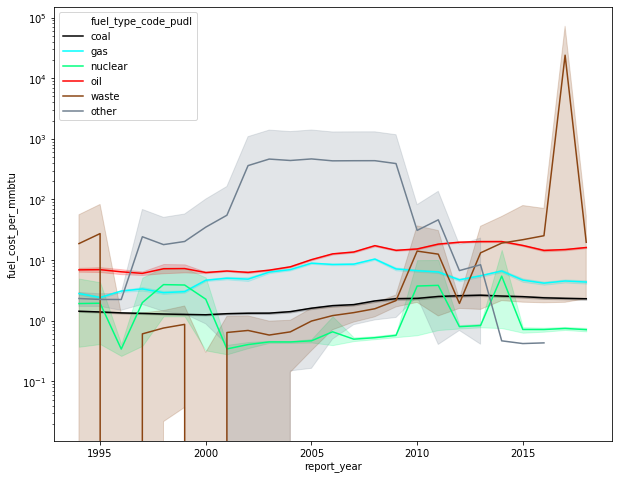

In [18]:
%matplotlib inline
plt.figure(figsize = (10, 8))
g=sns.lineplot(x='report_year', y='fuel_cost_per_mmbtu',hue='fuel_type_code_pudl',palette=col,data=fuel_data)
g.set_yscale("log")

The cost of fuel type can either increase or decrease with time. From the line plot above, Oil maintained an increasing cost from 1995 to 2015. Coal maintained an almost constant cost over time. There was an increase in the fuel cost of other fuel type not mentioned from the year 2000 to around 2008 before the price started reducing gradually. The cost of waste fuel type sky rocketed  from around 2015 before it started reducing gradually. The cost of nuclear fuel type fluctuated from around 1995 to 2015.

### Are some fuels becoming popular over time

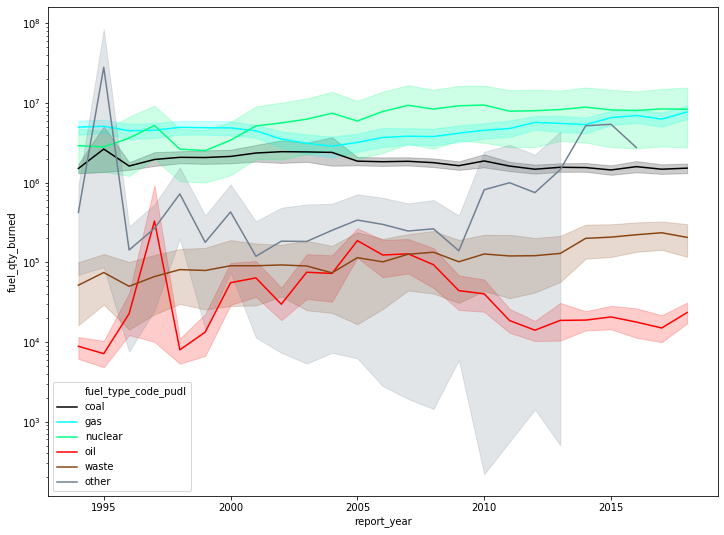

In [19]:
%matplotlib inline
plt.figure(figsize = (12, 9))
g = sns.lineplot(x = 'report_year', y = 'fuel_qty_burned', hue = 'fuel_type_code_pudl', palette = col, data = fuel_data)
g.set_yscale('log')

From the line plot, it shows the quantity of each fuel type burned over time ranging from 1995 to 2015. The quantity of Nuclear fuel type burnt has been on the increase. The demand of coal has maintained almost a constant quantity from 1995 to 2015. The quantity of other fuel type burnt fluctuated around 2000 and started a sudden increase from 2010. The quantity of oil burnt started reducing around 2010. This simply shows that other types of fuel was being explored rather than only oil Unlike around 1998, when the demand was high. The plot shows that other sources of fuel have actually been explored while nuclear and gas has maintained a high demand as well.

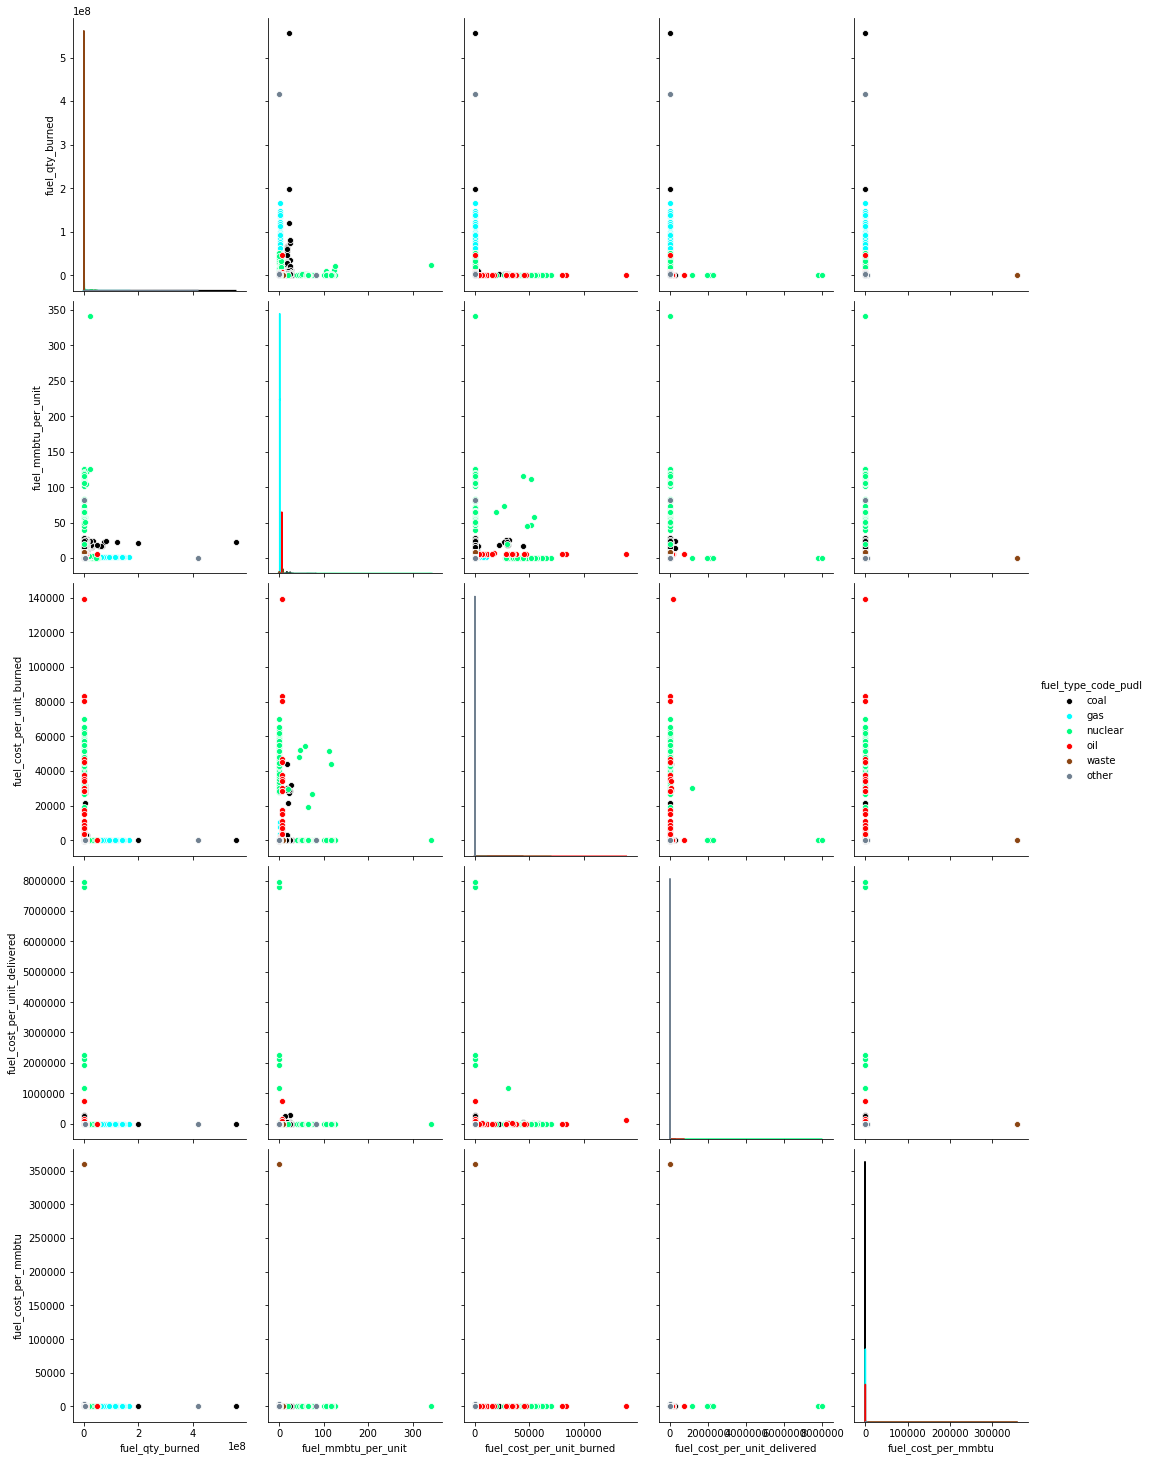

In [20]:
#to get all the scatter plots done at once
%matplotlib inline
a= sns.pairplot(fuel_data, hue='fuel_type_code_pudl',x_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               ,'fuel_cost_per_unit_delivered'
                               ,'fuel_cost_per_mmbtu'], y_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               ,'fuel_cost_per_unit_delivered'
                               ,'fuel_cost_per_mmbtu'],palette=col,height=4,aspect=0.7)